# IBM Applied Data Science Capstone
### The Battle of the Neighborhoods

## Table of contents
* [Introduction: The (Small) Business Problem](#introduction)
* [The Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Introduction: The (Small) Business Problem

The objective of this project is to find a safe and potentially profitable location to start a small business such as a restaurant or a bar in Atlanta, GA. Small entrepreneurs who are considering opening such businesses will be target audience for this report.

The report will try to make a recommendation to identify locations by analyzing key statistics such as crime, demographics, geographical information.

Since the target audience are small entrepreneurs to reduce the startup costs, report will try to use publicly available government sources to make location recommendations. 

## The Data <a name="data"></a>

Based on the objective, datasets have to be gathered to make decisions.
* Analyze Atlanta NPUs to identify safe neighborhoods
* Finding Venues to make a recomendation
* Choosing the right neighborhood

To make these decisions the analysis will use data from Atlanta's official public data sources listed below:

1. Atlanta Police Department: Data repository containing hsitoric crime reports dating back to 2009. These data sets contain information relevant to analysis they are :-
 - Report Number: PD's Record locator.
 - Occur Date: Date the crime occured.
 - Report Date: Date the crime was reported or recorded in PD's Sustem. 
 - Location: Street address where the crime was reported.
 - UCR Literal: Nature and type of crime.
 - Neighborhood: Neighborhood where the crime was reported.
 - Latitude & Longitude: Geographical location of reported crime. 
 
For this analysis data was extracted from APD website for years 2017 to 2020.
 Location of Dataset extract: https://raw.githubusercontent.com/sravann/Coursera_Capstone/master/COBRA_2017-2020.csv
 
APD official Source: https://www.atlantapd.org/i-want-to/crime-data-downloads

2. Atlanta Department of City Planning: offical GIS information from containing Neighborhood Planning Unit (NPU) information with Neighborhood name and NPU code. These data sets contain information relevant to analysis they are :-
 - NAME: Name of the neighborhood 
 - NPU: NPU code from A-Z, groups neighborhoods from A to Z. 
 
3. City of Atlanta- official Website: Website with information on neighborhood demographic information. The data set contains information on :-
 - NPU: Atlanta's Neighborhood Planing Unit(NPU) identifier. 
 - Region 
 - Median Age: identify general age group of the neighborhood to cater targeted goods and services. 
 - Median Income: To asses income of general population that will help with pricing of goods and services. 
 - Meidan Home Values: To provide general informaiton on housing and realestate.
 - Population: Total population of the neighborhood.
 - Growth: population growth of the neighborhood to asses growing or declining neighborhoods.
 
 Location of consilidated dataset: https://raw.githubusercontent.com/sravann/Coursera_Capstone/master/COBRA_2017-2020.csv
 

### Importing Necessary Libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

#To normalise data returned by FourSquare API
from pandas.io.json import json_normalize

#Importing KMeans from SciKit library to Classify neighborhoods into clusters
from sklearn.cluster import KMeans

#Importing OpenCage Geocoder
from opencage.geocoder import OpenCageGeocode

# use the inline backend to generate the plots within the browser
%matplotlib inline 

#Importing Matplot lib and associated packages to perform Data Visualisation and Exploratory Data Analysis
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


print('Libraries imported.')

Libraries imported.


### Importing Crime Reports DataSet

In [2]:
atl_crime_df = pd.read_csv('https://raw.githubusercontent.com/sravann/Coursera_Capstone/master/COBRA_2017-2020.csv')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,5,6,11,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
atl_crime_df.drop(['Occur Time',
                   'Possible Date',
                   'Possible Time',
                   'Beat',
                   'Apartment Office Prefix',
                   'Apartment Number',
                   'Shift Occurence',
                   'Location Type',
                   'UCR #',
                   'IBR Code'], axis = 1, inplace = True)

### Cleaning Data Set

In [4]:
atl_crime_df.dropna(inplace=True)

In [5]:
#convert date columns to DateTime Data type
atl_crime_df['Occur Date'] = pd.to_datetime(atl_crime_df['Occur Date'], errors='coerce')
atl_crime_df['Report Date'] = pd.to_datetime(atl_crime_df['Report Date'], errors='coerce')
atl_crime_df.dropna(inplace=True)
atl_crime_df.shape

(138681, 9)

In [6]:
atl_crime_df

,Report Number,Report Date,Occur Date,Location,UCR Literal,Neighborhood,NPU,Latitude,Longitude
1,170010193,2017-01-01,2016-12-31,840 ATWOOD ST SW,LARCENY-FROM VEHICLE,Oakland City,S,33.732140,-84.429160
2,170010232,2017-01-01,2016-12-30,300 MARTIN L KING JR DR SE,LARCENY-FROM VEHICLE,Oakland,W,33.748030,-84.378750
3,170010294,2017-01-01,2016-12-31,425 MARKHAM ST,LARCENY-FROM VEHICLE,Downtown,M,33.748750,-84.394750
4,170010593,2017-01-01,2016-12-31,2640 METROPOLITAN PKWY SW,LARCENY-FROM VEHICLE,Perkerson,X,33.682630,-84.407440
5,170010712,2017-01-01,2017-01-01,1888 CHESHIRE BRIDGE RD NE,LARCENY-FROM VEHICLE,Morningside/Lenox Park,F,33.810380,-84.361220
...,...,...,...,...,...,...,...,...,...
144679,203151875,2020-11-11,2020-11-10,1059 OGLETHORPE AVE SW,AGG ASSAULT,West End,T,33.736303,-84.422302
144680,203151900,2020-11-11,2020-11-10,3755 CARMIA DR SW,AUTO THEFT,Princeton Lakes,P,33.655914,-84.508455
144681,203160070,2020-11-11,2020-11-10,3097 PIEDMONT RD NE,LARCENY-FROM VEHICLE,Peachtree Park,B,33.840328,-84.368909
144682,203160083,2020-11-11,2020-11-10,350 MARIETTA ST NW,LARCENY-FROM VEHICLE,Downtown,M,33.762661,-84.397208


## Methodology <a name="methodology"></a>

1. EDA
 - Exploratory Data Analysis was performed to help investors with some key insights into the city. This was done by counting the crimereports across the city's NPUs and their respective neighborhoods.

2. Modelling
 - Also to help investors use the right neighborhood within an NPU we will be clustering similar neighborhoods using K - means clustering using datasets based on predefined cluster size. K-Means clustering will be used to a group data based on existing venues which will provide insights to make informed decisions. 

In [7]:
atl_crime_by_NPU = atl_crime_df['NPU'].value_counts()
atl_crime_by_NPU = atl_crime_by_NPU.reset_index()
atl_crime_by_NPU.columns = ['NPU', 'Crime_Reports']

#### Crime Reports by NPU ( Neighborhood Planning Unit)

In [8]:
atl_crime_by_NPU

,NPU,Crime_Reports
0,M,18677
1,E,15542
2,B,15337
3,V,6579
4,D,6261
5,F,5976
6,N,5947
7,Z,5521
8,T,5475
9,W,5383


#### Crime Reports by Neighborhood

In [9]:
atl_crime_by_neb = atl_crime_df['Neighborhood'].value_counts()
atl_crime_by_neb = atl_crime_by_neb.reset_index()
atl_crime_by_neb.columns = ['Neighborhood', 'Crime_Reports']

##### Highest and lowest Crimes Reports by Neighborhood

In [10]:
atl_crime_by_neb.head()

,Neighborhood,Crime_Reports
0,Downtown,11519
1,Midtown,9005
2,Old Fourth Ward,3886
3,Lindbergh/Morosgo,3292
4,West End,2898


In [11]:
atl_crime_by_neb.tail()

,Neighborhood,Crime_Reports
236,Regency Trace,2
237,Chattahoochee,2
238,Old Fairburn Village,2
239,State Facility,1
240,Mt. Paran Parkway,1


#### Additional Data Transformations for Atlanta crime data

In [12]:
atl_crime_df['Year'] = pd.DatetimeIndex(atl_crime_df['Report Date']).year
atl_crime_df['Month'] = pd.DatetimeIndex(atl_crime_df['Report Date']).month

In [13]:
atl_crime_df.head()

,Report Number,Report Date,Occur Date,Location,UCR Literal,Neighborhood,NPU,Latitude,Longitude,Year,Month
1,170010193,2017-01-01,2016-12-31,840 ATWOOD ST SW,LARCENY-FROM VEHICLE,Oakland City,S,33.73214,-84.42916,2017,1
2,170010232,2017-01-01,2016-12-30,300 MARTIN L KING JR DR SE,LARCENY-FROM VEHICLE,Oakland,W,33.74803,-84.37875,2017,1
3,170010294,2017-01-01,2016-12-31,425 MARKHAM ST,LARCENY-FROM VEHICLE,Downtown,M,33.74875,-84.39475,2017,1
4,170010593,2017-01-01,2016-12-31,2640 METROPOLITAN PKWY SW,LARCENY-FROM VEHICLE,Perkerson,X,33.68263,-84.40744,2017,1
5,170010712,2017-01-01,2017-01-01,1888 CHESHIRE BRIDGE RD NE,LARCENY-FROM VEHICLE,Morningside/Lenox Park,F,33.81038,-84.36122,2017,1


In [14]:
atl_crime_cat = pd.pivot_table(atl_crime_df,
                               values=['Year'],
                               index=['NPU'],
                               columns=['UCR Literal'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
atl_crime_cat

Year                                      \
UCR Literal AGG ASSAULT AUTO THEFT BURGLARY BURGLARY-NONRES   
NPU                                                           
A                    16        176       77              15   
B                   474       1713      816             197   
C                    38        242       92              12   
D                   124        809      244             114   
E                   499       1852      577             193   
F                   231        659      408             252   
G                   433        426      102              35   
H                   526        488      346              43   
I                   488        548      279              46   
J                   657        442      399              65   
K                   528        298      197              31   
L                   523        374      157              51   
M                  1487       1845      646             193   
N                   132        582      239              73   
O                   206        362      151              51   
P                   314        579      147              36   
Q                     4         18        0               0   
R                   751        870      398             174   
S                   599        381      395              66   
T                   740        910      234              91   
V                   962       1118      445              71   
W                   276        675      301             103   
X                   647        720      327             124   
Y                   564        503      150              81   
Z                   946       1013      335             107   
All               12165      17603     7462            2224   

                                                              \
UCR Literal BURGLARY-RESIDENCE HOMICIDE LARCENY-FROM VEHICLE   
NPU                                                            
A                           64        1                  675   
B                          378       51                 5760   
C                           89        1                 1047   
D                          133        5                 3449   
E                          319       26                 7825   
F                          147        8                 3043   
G                          213       17                  646   
H                          305       27                  734   
I                          343       33                  744   
J                          380       37                  540   
K                          233       37                  513   
L                          234       11                  753   
M                          264       63                 8741   
N                          121        2                 3357   
O                          245       16                 1048   
P                          248       23                 1297   
Q                            3        1                   35   
R                          322       30                 1290   
S                          440       16                  723   
T                          316       32                 1557   
V                          344       56                 1906   
W                          359       12                 2286   
X                          298       25                 1653   
Y                          376       19                  864   
Z                          450       42                 1337   
All                       6624      591                51823   

                                                                         \
UCR Literal LARCENY-NON VEHICLE MANSLAUGHTER ROBBERY ROBBERY-COMMERCIAL   
NPU                                                                       
A                           171            0       8                  3   
B                          5557   

#### Pivoting the table to better understand the data by crimes per neighborhood

In [15]:
atl_crime_neb = pd.pivot_table(atl_crime_df,
                               values=['Year'],
                               index=['Neighborhood'],
                               columns=['UCR Literal'],
                               aggfunc=len,
                               fill_value=0,
                               margins=True)
atl_crime_neb

Year                                      \
UCR Literal      AGG ASSAULT AUTO THEFT BURGLARY BURGLARY-NONRES   
Neighborhood                                                       
Adair Park                87        161       73              18   
Adams Park                40         73       44              30   
Adamsville               187        139      152              28   
Almond Park               58         57       24               2   
Amal Heights              18         12        1               0   
...                      ...        ...      ...             ...   
Wisteria Gardens           6         16       29               0   
Woodfield                  0          0        0               0   
Woodland Hills             3         21       38               8   
Wyngate                    0          7        0               0   
All                    12165      17603     7462            2224   

                                                                   \
UCR Literal      BURGLARY-RESIDENCE HOMICIDE LARCENY-FROM VEHICLE   
Neighborhood                                                        
Adair Park                       43        4                  274   
Adams Park                       31        2                   93   
Adamsville                       43       12                  313   
Almond Park                      21        3                   44   
Amal Heights                      7        0                   46   
...                             ...      ...                  ...   
Wisteria Gardens                 11        0                   15   
Woodfield                         1        0                   17   
Woodland Hills                   15        0                   28   
Wyngate                           3        0                   20   
All                            6624      591                51823   

                                                                              \
UCR Literal      LARCENY-NON VEHICLE MANSLAUGHTER ROBBERY ROBBERY-COMMERCIAL   
Neighborhood                                                                   
Adair Park                       234            0       9                  7   
Adams Park                       130            0       4                  5   
Adamsville                       484            0      41                  9   
Almond Park                       42            0      11                  1   
Amal Heights                       5            0       0                  0   
...                              ...          ...     ...                ...   
Wisteria Gardens                  17            0       0                  0   
Woodfield                          1            0       0                  0   
Woodland Hills                    62            0      14                  7   
Wyngate                            4            0       0                  0   
All                            34306           17    2513                450   

                                                               
UCR Literal      ROBBERY-PEDESTRIAN ROBBERY-RESIDENCE     All  
Neighborhood                                                   
Adair Park                       27                 3     940  
Adams Park                       15                 3     470  
Adamsville                       46                 6    1460  
Almond Park                      12                 1     276  
Amal Heights                      1                 0      90  
...                             ...               ...     ...  
Wisteria Gardens                  2                 0      96  
Woodfield                         0                 0      19  
Woodland Hills                    2                 1     199  
Wyngate                           0                 0      34  
All                            2547               356  138681  

[242 rows x 14 columns]

### Visualizing Crime Reports

In [16]:
top_crime = atl_crime_by_neb[['Neighborhood','Crime_Reports']]

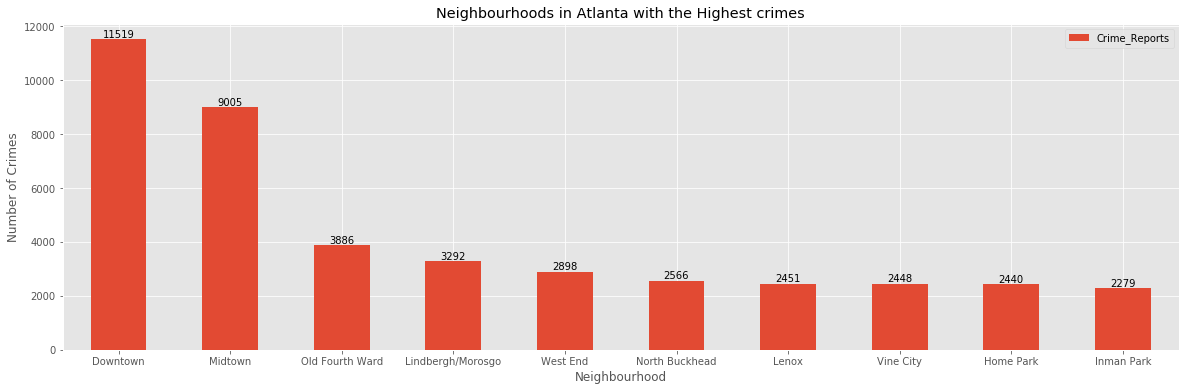

In [22]:
top_crime = atl_crime_by_neb[['Neighborhood','Crime_Reports']]

top_crime.set_index('Neighborhood',inplace = True)

ax = top_crime[:10].plot(kind='bar', figsize=(20, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Atlanta with the Highest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize = 10,
               )

plt.show()

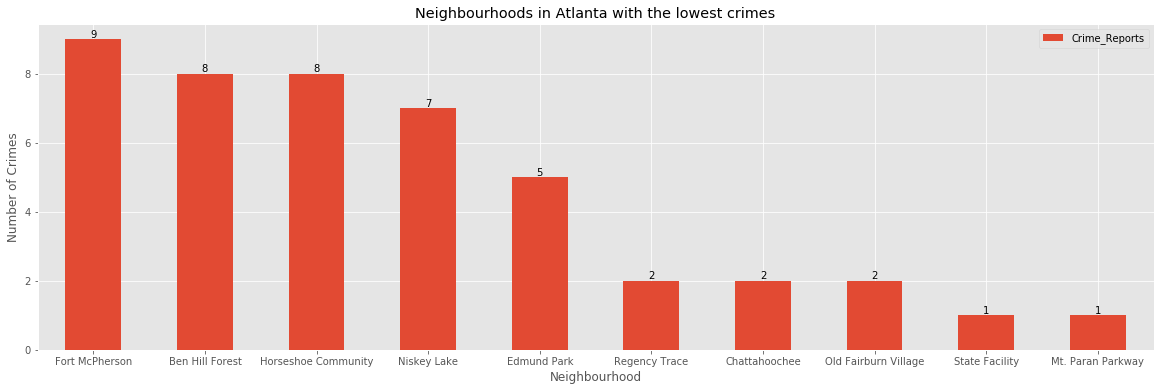

In [18]:
top_crime = atl_crime_by_neb[['Neighborhood','Crime_Reports']]

top_crime.set_index('Neighborhood',inplace = True)

ax = top_crime[-10:].plot(kind='bar', figsize=(20, 6), rot=0)

ax.set_ylabel('Number of Crimes')
ax.set_xlabel('Neighbourhood')
ax.set_title('Neighbourhoods in Atlanta with the lowest crimes')

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 5), 
                textcoords='offset points',
                fontsize = 10,
               )

plt.show()

### Importing Census Dataset

In [19]:
atl_census_npu = pd.read_csv('https://raw.githubusercontent.com/sravann/Coursera_Capstone/master/atlanta_census.csv', engine='python')

In [20]:
atl_census_npu.head()

,NPU,Major neighborhoods,Region,2017_Pop,Median_Age,Income,Median_Home_Value,2010_Pop,2000_Pop,Growth %
0,A,Paces/ Margaret Mitchell/ Mt. Paran/Northside/...,Buckhead,12212.0,46.2,195259.0,961111.0,11687.0,11300.0,3.40%
1,B,Buckhead Village/ North Buckhead/ Lindbergh/ P...,Buckhead,59094.0,36.8,85552.0,491720.0,47292.0,38645.0,22.40%
2,C,Collier Hills/Peachtree Battle/Arden/Habersham...,Buckhead,23236.0,38.0,92615.0,630175.0,18122.0,16199.0,11.90%
3,D,Whittier Mill Village/ Riverside/ Bolton/ Unde...,Border Buckhead/West Midtown/Northwest,14591.0,32.5,76631.0,296014.0,10690.0,8690.0,23.00%
4,E,Midtown/ Georgia Tech/ Atlantic Station/ Lorin...,Downtown/Midtown,53116.0,30.5,72766.0,330484.0,42121.0,34461.0,22.20%


#### Merging Crime and Census Datsets

In [21]:
atl_neb_df = pd.read_csv('https://opendata.arcgis.com/datasets/297d3d69d8ab4c6ba5f9264ad5e75c0a_3.csv', index_col=None)
atl_neb_df.head()

,OBJECTID,LOCALID,NAME,GEOTYPE,FULLFIPS,LEGALAREA,EFFECTDATE,ENDDATE,SRCREF,ACRES,SQMILES,OLDNAME,NPU,CREATED_USER,CREATED_DATE,LAST_EDITED_USER,LAST_EDITED_DATE,GLOBALID
0,148,NaN,Atlanta University Center,Neighborhood,NaN,NaN,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,331.57,0.52,Atlanta University,T,NaN,1970/01/01 00:00:00+00,GIS,2018/05/15 13:24:10+00,{D6CAF694-B83F-4CB9-B351-CA3E3145D0C7}
1,149,NaN,Hunter Hills,Neighborhood,NaN,NaN,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,322.58,0.50,Hunter Hills,K,NaN,1970/01/01 00:00:00+00,GIS,2018/05/15 13:24:10+00,{8A4F3C84-CCC3-478C-82BA-7E4174935428}
2,150,NaN,Historic Westin Heights/Bankhead,Neighborhood,NaN,NaN,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,416.09,0.65,Bankhead,K,NaN,1970/01/01 00:00:00+00,GIS,2020/03/09 21:24:51+00,{70303C29-B16F-4E33-9FEC-A33B2244D3AB}
3,151,NaN,English Avenue,Neighborhood,NaN,NaN,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,519.00,0.81,English Avenue,L,NaN,1970/01/01 00:00:00+00,GIS,2018/05/15 13:24:10+00,{9B6F9DF9-B38E-46FB-993B-4D1DA42AC049}
4,152,NaN,Adair Park,Neighborhood,NaN,NaN,1970/01/01 00:00:00+00,1970/01/01 00:00:00+00,NaN,289.28,0.45,Adair Park,V,NaN,1970/01/01 00:00:00+00,GIS,2018/05/15 13:24:10+00,{D8FD5CB2-4D90-4EEB-A33A-B52E6D66E345}


In [22]:
atl_npu_df= pd.read_csv('https://opendata.arcgis.com/datasets/91911cd123624a6b9b88cbf4266a2309_4.csv', index_col=None,
                        usecols=['NAME', 'ACRES'])
atl_npu_df.columns = ['NPU', 'Acres']

atl_npu_df.head()

,NPU,Acres
0,T,1750.92
1,C,3873.74
2,Q,1068.27
3,F,3842.11
4,Y,2106.63


In [23]:
atl_npu_df['Sqmiles']=atl_npu_df['Acres'] * 0.0015625

In [24]:
atl_npu_df

,NPU,Acres,Sqmiles
0,T,1750.92,2.735813
1,C,3873.74,6.052719
2,Q,1068.27,1.669172
3,F,3842.11,6.003297
4,Y,2106.63,3.291609
5,X,2789.22,4.358156
6,E,3779.78,5.905906
7,V,2027.09,3.167328
8,B,6516.11,10.181422
9,I,6137.13,9.589266


In [25]:
#atl_census_crime = pd.concat([atl_crime_by_NPU,atl_census_npu], axis=1, keys= atl_crime_by_NPU['NPU'])
atl_census_crime = pd.merge(atl_crime_by_NPU,atl_census_npu, on='NPU')
atl_census_crime.head()

,NPU,Crime_Reports,Major neighborhoods,Region,2017_Pop,Median_Age,Income,Median_Home_Value,2010_Pop,2000_Pop,Growth %
0,M,18677,Downtown/ Old Fourth Ward/ Sweet Auburn/ Castl...,Downtown/Midtown,32472.0,30.7,51937.0,215690.0,26886.0,21359.0,25.90%
1,E,15542,Midtown/ Georgia Tech/ Atlantic Station/ Lorin...,Downtown/Midtown,53116.0,30.5,72766.0,330484.0,42121.0,34461.0,22.20%
2,B,15337,Buckhead Village/ North Buckhead/ Lindbergh/ P...,Buckhead,59094.0,36.8,85552.0,491720.0,47292.0,38645.0,22.40%
3,V,6579,Capitol Gateway/ Summerhill/ Peoplestown/ Mech...,Southwest,15385.0,32.2,21095.0,168387.0,14198.0,15825.0,-10.30%
4,D,6261,Whittier Mill Village/ Riverside/ Bolton/ Unde...,Border Buckhead/West Midtown/Northwest,14591.0,32.5,76631.0,296014.0,10690.0,8690.0,23.00%


In [26]:
atl_census_crime.sort_values(by=['Crime_Reports'])

,NPU,Crime_Reports,Major neighborhoods,Region,2017_Pop,Median_Age,Income,Median_Home_Value,2010_Pop,2000_Pop,Growth %
24,Q,87,Midwest Cascade/Regency Trace,Southwest,3522.0,41.2,61465.0,245135.0,1770.0,1024.0,72.90%
23,A,1213,Paces/ Margaret Mitchell/ Mt. Paran/Northside/...,Buckhead,12212.0,46.2,195259.0,961111.0,11687.0,11300.0,3.40%
22,C,1763,Collier Hills/Peachtree Battle/Arden/Habersham...,Buckhead,23236.0,38.0,92615.0,630175.0,18122.0,16199.0,11.90%
21,G,2326,West Highlands/ Carey Park,Northwest,9006.0,29.3,19185.0,124171.0,8381.0,11632.0,-27.90%
20,K,2471,Bankhead/ Washington Park/ Mozley Park/ Hunter...,Northwest,9875.0,36.9,27116.0,112422.0,9399.0,11997.0,-21.70%
19,P,3258,Ben Hill/(SW Atlanta W of I-285),Southwest,19387.0,36.7,47811.0,177521.0,17363.0,11911.0,45.80%
18,J,3565,Grove Park/ Center Hill,Northwest,12471.0,38.4,23023.0,90516.0,12533.0,17085.0,-26.60%
17,H,3566,Adamsville/areas S of I-20/W of I-285/N of Cas...,Southwest,14624.0,35.9,26147.0,116396.0,14049.0,17274.0,-18.70%
16,Y,3653,South Atlanta/ Lakewood Heights/ Chosewood Park,Southeast,11151.0,34.2,21326.0,126734.0,11111.0,12472.0,-10.90%
15,S,3683,Oakland City/ Venetian Hills/Cascade Avenue/Ro...,Southwest,10505.0,38.9,30764.0,106780.0,10204.0,12396.0,-17.70%


In [27]:
atl_npu_df.shape

(25, 3)

In [28]:
atl_census_crime = pd.merge(atl_census_crime,atl_npu_df, on='NPU')
atl_census_crime.head()

,NPU,Crime_Reports,Major neighborhoods,Region,2017_Pop,Median_Age,Income,Median_Home_Value,2010_Pop,2000_Pop,Growth %,Acres,Sqmiles
0,M,18677,Downtown/ Old Fourth Ward/ Sweet Auburn/ Castl...,Downtown/Midtown,32472.0,30.7,51937.0,215690.0,26886.0,21359.0,25.90%,2421.90,3.784219
1,E,15542,Midtown/ Georgia Tech/ Atlantic Station/ Lorin...,Downtown/Midtown,53116.0,30.5,72766.0,330484.0,42121.0,34461.0,22.20%,3779.78,5.905906
2,B,15337,Buckhead Village/ North Buckhead/ Lindbergh/ P...,Buckhead,59094.0,36.8,85552.0,491720.0,47292.0,38645.0,22.40%,6516.11,10.181422
3,V,6579,Capitol Gateway/ Summerhill/ Peoplestown/ Mech...,Southwest,15385.0,32.2,21095.0,168387.0,14198.0,15825.0,-10.30%,2027.09,3.167328
4,D,6261,Whittier Mill Village/ Riverside/ Bolton/ Unde...,Border Buckhead/West Midtown/Northwest,14591.0,32.5,76631.0,296014.0,10690.0,8690.0,23.00%,4150.56,6.485250


In [29]:
atl_census_crime['population_density']= atl_census_crime['2017_Pop'] / atl_census_crime['Sqmiles']

In [30]:
atl_census_crime.dtypes

NPU                     object
Crime_Reports            int64
Major neighborhoods     object
Region                  object
2017_Pop               float64
Median_Age             float64
Income                 float64
Median_Home_Value      float64
2010_Pop               float64
2000_Pop               float64
Growth %                object
Acres                  float64
Sqmiles                float64
population_density     float64
dtype: object

In [31]:
atl_census_crime.head()

,NPU,Crime_Reports,Major neighborhoods,Region,2017_Pop,Median_Age,Income,Median_Home_Value,2010_Pop,2000_Pop,Growth %,Acres,Sqmiles,population_density
0,M,18677,Downtown/ Old Fourth Ward/ Sweet Auburn/ Castl...,Downtown/Midtown,32472.0,30.7,51937.0,215690.0,26886.0,21359.0,25.90%,2421.90,3.784219,8580.899294
1,E,15542,Midtown/ Georgia Tech/ Atlantic Station/ Lorin...,Downtown/Midtown,53116.0,30.5,72766.0,330484.0,42121.0,34461.0,22.20%,3779.78,5.905906,8993.708629
2,B,15337,Buckhead Village/ North Buckhead/ Lindbergh/ P...,Buckhead,59094.0,36.8,85552.0,491720.0,47292.0,38645.0,22.40%,6516.11,10.181422,5804.100913
3,V,6579,Capitol Gateway/ Summerhill/ Peoplestown/ Mech...,Southwest,15385.0,32.2,21095.0,168387.0,14198.0,15825.0,-10.30%,2027.09,3.167328,4857.406430
4,D,6261,Whittier Mill Village/ Riverside/ Bolton/ Unde...,Border Buckhead/West Midtown/Northwest,14591.0,32.5,76631.0,296014.0,10690.0,8690.0,23.00%,4150.56,6.485250,2249.874716


In [32]:
atl_census_crime_sort = atl_census_crime.sort_values(by=["Income", "population_density","Crime_Reports","Median_Home_Value"], ascending=(False,False,True,True)).reset_index(drop=True)
atl_census_crime_sort

,NPU,Crime_Reports,Major neighborhoods,Region,2017_Pop,Median_Age,Income,Median_Home_Value,2010_Pop,2000_Pop,Growth %,Acres,Sqmiles,population_density
0,A,1213,Paces/ Margaret Mitchell/ Mt. Paran/Northside/...,Buckhead,12212.0,46.2,195259.0,961111.0,11687.0,11300.0,3.40%,7317.40,11.433438,1068.095225
1,C,1763,Collier Hills/Peachtree Battle/Arden/Habersham...,Buckhead,23236.0,38.0,92615.0,630175.0,18122.0,16199.0,11.90%,3873.74,6.052719,3838.936015
2,B,15337,Buckhead Village/ North Buckhead/ Lindbergh/ P...,Buckhead,59094.0,36.8,85552.0,491720.0,47292.0,38645.0,22.40%,6516.11,10.181422,5804.100913
3,N,5947,Inman Park/ Candler Park/ Poncey-Highland/ Rey...,Northeast / East,20561.0,35.3,81614.0,401754.0,17389.0,14688.0,18.40%,2204.43,3.444422,5969.361694
4,D,6261,Whittier Mill Village/ Riverside/ Bolton/ Unde...,Border Buckhead/West Midtown/Northwest,14591.0,32.5,76631.0,296014.0,10690.0,8690.0,23.00%,4150.56,6.485250,2249.874716
5,F,5976,Virginia-Highland/ Morningside/Lenox Park,Northeast / East,33198.0,33.5,76277.0,554154.0,23641.0,20890.0,13.20%,3842.11,6.003297,5529.961401
6,E,15542,Midtown/ Georgia Tech/ Atlantic Station/ Lorin...,Downtown/Midtown,53116.0,30.5,72766.0,330484.0,42121.0,34461.0,22.20%,3779.78,5.905906,8993.708629
7,W,5383,Grant Park/ East Atlanta/ Ormewood Park/ Bente...,Northeast / East,22655.0,36.4,68598.0,266044.0,19233.0,20054.0,-4.10%,3488.54,5.450844,4156.237280
8,Q,87,Midwest Cascade/Regency Trace,Southwest,3522.0,41.2,61465.0,245135.0,1770.0,1024.0,72.90%,1068.27,1.669172,2110.028364
9,O,4101,Edgewood/ Kirkwood/ East Lake,Northeast / East,15305.0,36.6,55259.0,271520.0,13886.0,14724.0,-5.70%,2489.03,3.889109,3935.348308


In [33]:
atl_census_crime_sort=atl_census_crime_sort.convert_dtypes()
atl_census_crime_sort.dtypes

NPU                     string
Crime_Reports            Int64
Major neighborhoods     string
Region                  string
2017_Pop                 Int64
Median_Age             float64
Income                   Int64
Median_Home_Value        Int64
2010_Pop                 Int64
2000_Pop                 Int64
Growth %                string
Acres                  float64
Sqmiles                float64
population_density     float64
dtype: object

## Analysis <a name="analysis"></a>

Text(0.5, 0.98, 'choosing ideal neighborhood')

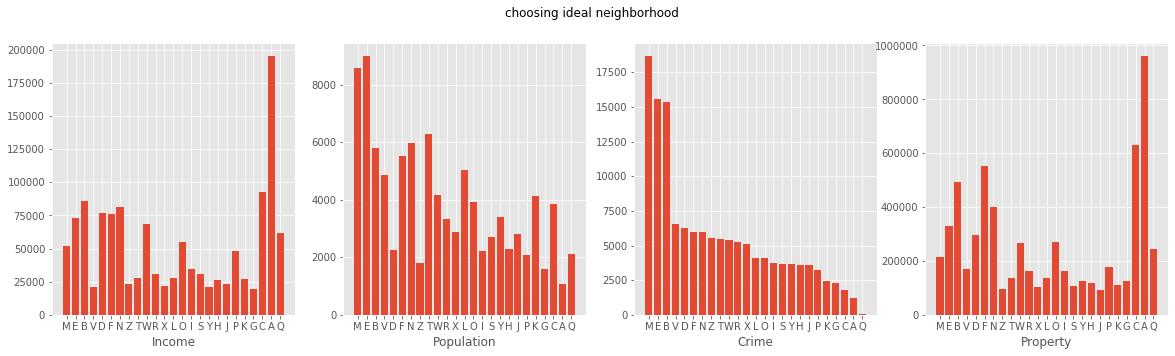

In [34]:
import matplotlib.pyplot as plt


NPU = list(atl_census_crime['NPU'])
Income = list(atl_census_crime['Income'])
Population = list(atl_census_crime['population_density'])
Crime = list(atl_census_crime['Crime_Reports'])
Property = list(atl_census_crime['Median_Home_Value'])

fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=False)
axs[0].bar(NPU, Income)
axs[0].set_xlabel('Income')

axs[1].bar(NPU, Population)
axs[1].set_xlabel('Population')

axs[2].bar(NPU, Crime)
axs[2].set_xlabel('Crime')

axs[3].bar(NPU, Property)
axs[3].set_xlabel('Property')

fig.suptitle('choosing ideal neighborhood')

In [35]:
atl_top_neb=atl_census_crime[(atl_census_crime['Income']>60000) & 
                             (atl_census_crime['population_density']>3000) &
                             (atl_census_crime['Crime_Reports']<2500) &
                             (atl_census_crime['Median_Home_Value']<500000)]
atl_top_neb

,NPU,Crime_Reports,Major neighborhoods,Region,2017_Pop,Median_Age,Income,Median_Home_Value,2010_Pop,2000_Pop,Growth %,Acres,Sqmiles,population_density


In [36]:
atl_top_neb=atl_census_crime[(atl_census_crime['Income']>65000) & 
                             (atl_census_crime['population_density']>3000) &
                             (atl_census_crime['Crime_Reports']<6000)]
atl_top_neb

,NPU,Crime_Reports,Major neighborhoods,Region,2017_Pop,Median_Age,Income,Median_Home_Value,2010_Pop,2000_Pop,Growth %,Acres,Sqmiles,population_density
5,F,5976,Virginia-Highland/ Morningside/Lenox Park,Northeast / East,33198.0,33.5,76277.0,554154.0,23641.0,20890.0,13.20%,3842.11,6.003297,5529.961401
6,N,5947,Inman Park/ Candler Park/ Poncey-Highland/ Rey...,Northeast / East,20561.0,35.3,81614.0,401754.0,17389.0,14688.0,18.40%,2204.43,3.444422,5969.361694
9,W,5383,Grant Park/ East Atlanta/ Ormewood Park/ Bente...,Northeast / East,22655.0,36.4,68598.0,266044.0,19233.0,20054.0,-4.10%,3488.54,5.450844,4156.237280
22,C,1763,Collier Hills/Peachtree Battle/Arden/Habersham...,Buckhead,23236.0,38.0,92615.0,630175.0,18122.0,16199.0,11.90%,3873.74,6.052719,3838.936015


In [37]:
atl_census_crime.describe()

,Crime_Reports,2017_Pop,Median_Age,Income,Median_Home_Value,2010_Pop,2000_Pop,Acres,Sqmiles,population_density
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,5547.240000,19487.480000,35.244000,51998.040000,259364.240000,16800.960000,16697.000000,3500.475600,5.469493,3907.889040
std,4474.543164,13062.988894,4.540382,38429.533908,208604.790911,10020.895197,7866.354826,1804.460484,2.819470,2072.295660
min,87.000000,3522.000000,24.700000,19185.000000,90516.000000,1770.000000,1024.000000,846.170000,1.322141,1068.095225
25%,3565.000000,12212.000000,32.200000,26147.000000,124171.000000,11111.000000,11997.000000,2204.430000,3.444422,2249.874716
50%,4121.000000,15385.000000,36.400000,34658.000000,168387.000000,14198.000000,15825.000000,3448.140000,5.387719,3387.704533
75%,5947.000000,21310.000000,38.000000,72766.000000,296014.000000,18122.000000,20095.000000,4089.690000,6.390141,5044.092795
max,18677.000000,59094.000000,46.200000,195259.000000,961111.000000,47292.000000,38645.000000,7317.400000,11.433438,8993.708629


In [38]:
atl_ideal_neb=atl_neb_df[(atl_neb_df['NPU']=='C')]
atl_ideal_neb.drop(['OBJECTID',
                    'LOCALID',
                    'FULLFIPS',
                    'LEGALAREA',
                    'EFFECTDATE',
                    'ENDDATE',
                    'SRCREF',
                    'OLDNAME',
                    'CREATED_USER',
                    'CREATED_DATE',
                    'LAST_EDITED_USER',
                    'LAST_EDITED_DATE',
                    'GLOBALID'], axis=1, inplace=True)
atl_ideal_neb.reset_index(inplace=True, drop=True)


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
atl_ideal_neb['NAME']

0                       Brandon
1             Ridgewood Heights
2                      Fernleaf
3            Westminster/Milmar
4               Arden/Habersham
5                     Woodfield
6                    Springlake
7               Channing Valley
8                 Collier Hills
9                Colonial Homes
10          Westover Plantation
11                  Cross Creek
12                   Castlewood
13               Argonne Forest
14                      Wyngate
15    Peachtree Battle Alliance
16                Memorial Park
17             Wildwood (NPU-C)
18          Collier Hills North
19                 Hanover West
20                Wesley Battle
Name: NAME, dtype: object

In [40]:
Latitude = []
Longitude = []
NPU = []
Neighborhood = atl_ideal_neb['NAME']



key = 'c2b3b68172f449e3b464f6c4d2753447'
geocoder = OpenCageGeocode(key)

for i in range(len(Neighborhood)):
    address = '{}, Atlanta, Georgia, USA'.format(Neighborhood[i])
    location = geocoder.geocode(address)
    Latitude.append(location[0]['geometry']['lat'])
    Longitude.append(location[0]['geometry']['lng'])
    NPU.append('C')
print(Latitude, Longitude)

[33.8298268, 33.8278826, 33.821157, 33.836506, 33.717013, 33.951066, 33.8116936, 33.806033, 33.8121026, 33.8132831, 33.8231605, 33.815133, 33.834735, 33.7719084, 33.831412, 33.820079, 33.8712146, 33.590902, 33.8121026, 33.8205805, 33.755388] [-84.4154836, -84.4457625, -84.439727, -84.427529, -84.418103, -84.299632, -84.4147682, -84.409749, -84.429471, -84.395535, -84.4410401, -84.425245, -84.409932, -84.3777244, -84.399595, -84.389349, -84.3910383, -84.493133, -84.429471, -84.4324729, -84.337313]


In [41]:
atl_neb_geo=pd.DataFrame(data= {'Neighborhood': Neighborhood,'NPU':NPU,'Latitude': Latitude,'Longitude':Longitude}
                         , columns=['Neighborhood', 'NPU', 'Latitude', 'Longitude'], index=None)
atl_neb_geo

,Neighborhood,NPU,Latitude,Longitude
0,Brandon,C,33.829827,-84.415484
1,Ridgewood Heights,C,33.827883,-84.445763
2,Fernleaf,C,33.821157,-84.439727
3,Westminster/Milmar,C,33.836506,-84.427529
4,Arden/Habersham,C,33.717013,-84.418103
5,Woodfield,C,33.951066,-84.299632
6,Springlake,C,33.811694,-84.414768
7,Channing Valley,C,33.806033,-84.409749
8,Collier Hills,C,33.812103,-84.429471
9,Colonial Homes,C,33.813283,-84.395535


In [42]:
address = 'Atlanta, Georgia, USA'

location = geocoder.geocode(address)
latitude = location[0]['geometry']['lat']
longitude = location[0]['geometry']['lng']

print('The geograpical coordinate of  Atlanta, Georgia, USA are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of  Atlanta, Georgia, USA are 33.7489924, -84.3902644.


In [43]:
atl_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(atl_neb_geo['Latitude'], atl_neb_geo['Longitude'], atl_neb_geo['NPU'], atl_neb_geo['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, NPU)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(atl_map)  
    
atl_map

In [44]:
#FourSquare API Credentials. 
CLIENT_ID = 'HZ2KRHR5LP2KRLMRBUNX52WYA0SHUTMLCKHFDF0WEP3USN0D' # your Foursquare ID
CLIENT_SECRET = '5JRLPHOEOLEO12H0QDX12GEQP5I541BMOHPMOKWTRQ503LUL' # your Foursquare Secret
#VERSION = '20180604' # Foursquare API version
VERSION = '20191101'
LIMIT = 30

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HZ2KRHR5LP2KRLMRBUNX52WYA0SHUTMLCKHFDF0WEP3USN0D
CLIENT_SECRET:5JRLPHOEOLEO12H0QDX12GEQP5I541BMOHPMOKWTRQ503LUL


In [45]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                             'Latitude', 
                             'Longitude', 
                             'Venue', 
                             'Venue Category']
    
    return(nearby_venues)

In [46]:
atl_idealneb_venues = getNearbyVenues(names=atl_neb_geo['Neighborhood'],
                                   latitudes=atl_neb_geo['Latitude'],
                                   longitudes=atl_neb_geo['Longitude']
                                  )

Brandon
Ridgewood Heights
Fernleaf
Westminster/Milmar
Arden/Habersham
Woodfield
Springlake
Channing Valley
Collier Hills
Colonial Homes
Westover Plantation
Cross Creek
Castlewood
Argonne Forest
Wyngate
Peachtree Battle Alliance
Memorial Park
Wildwood (NPU-C)
Collier Hills North
Hanover West
Wesley Battle


In [47]:
atl_idealneb_venues

,Neighborhood,Latitude,Longitude,Venue,Venue Category
0,Brandon,33.829827,-84.415484,Coldstone Creamery,Ice Cream Shop
1,Fernleaf,33.821157,-84.439727,Galloway Athletic Complex,College Track
2,Fernleaf,33.821157,-84.439727,Westover phase 1 Pool,Pool
3,Fernleaf,33.821157,-84.439727,Liberty Park Dog Park,Dog Run
4,Fernleaf,33.821157,-84.439727,Deborah's International Chair Of stickers,Speakeasy
...,...,...,...,...,...
219,Wesley Battle,33.755388,-84.337313,Crossfit Around The Corner,Gym
220,Wesley Battle,33.755388,-84.337313,Tuffy # 30005,Automotive Shop
221,Wesley Battle,33.755388,-84.337313,Poppa Corn's Gourmet Popcorn,Candy Store
222,Wesley Battle,33.755388,-84.337313,Coan Recreation Center,Recreation Center


In [48]:
atl_idealneb_venues.groupby('Neighborhood').count().drop(['Latitude','Longitude','Venue Category'], axis = 1)

,Venue
Neighborhood,
Arden/Habersham,3
Argonne Forest,23
Brandon,1
Castlewood,5
Channing Valley,30
Collier Hills,13
Collier Hills North,13
Colonial Homes,26
Cross Creek,17


In [49]:
pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [50]:

atl_ven_cat = pd.get_dummies(atl_idealneb_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
atl_ven_cat['Neighborhood'] = atl_idealneb_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [atl_ven_cat.columns[-1]] + list(atl_ven_cat.columns[:-1])
atl_ven_cat = atl_ven_cat[fixed_columns]

atl_ven_cat

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Baseball Field,Basketball Court,Beer Garden,Boat or Ferry,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Campground,Candy Store,Chinese Restaurant,Clothing Store,Coffee Shop,College Track,Construction & Landscaping,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service,Food Truck,Fried Chicken Joint,Gas Station,Gastropub,Gay Bar,General Travel,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hookah Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Latin American Restaurant,Liquor Store,Lounge,Malay Restaurant,Martial Arts School,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,New American Restaurant,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Post Office,Pub,Racetrack,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Salon / Barbershop,Sandwich Place,Scenic Lookout,Shipping Store,Shop & Service,Shopping Mall,Shopping Plaza,Ski Trail,Smoke Shop,Southern / Soul Food Restaurant,Spa,Speakeasy,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Theater,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Brandon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fernleaf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fernleaf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fernleaf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fernleaf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Westminster/Milmar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Westminster/Milmar,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Arden/Habersham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Arden/Habersham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Arden/Habersham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
atl_ven_cat_grouped = atl_ven_cat.groupby('Neighborhood').mean().reset_index()
atl_ven_cat_grouped

,Neighborhood,American Restaurant,Art Gallery,Art Museum,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Baseball Field,Basketball Court,Beer Garden,Boat or Ferry,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Café,Cajun / Creole Restaurant,Campground,Candy Store,Chinese Restaurant,Clothing Store,Coffee Shop,College Track,Construction & Landscaping,Cosmetics Shop,Cuban Restaurant,Cupcake Shop,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service,Food Truck,Fried Chicken Joint,Gas Station,Gastropub,Gay Bar,General Travel,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hookah Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Latin American Restaurant,Liquor Store,Lounge,Malay Restaurant,Martial Arts School,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Mobile Phone Shop,New American Restaurant,Outdoors & Recreation,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Post Office,Pub,Racetrack,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Salon / Barbershop,Sandwich Place,Scenic Lookout,Shipping Store,Shop & Service,Shopping Mall,Shopping Plaza,Ski Trail,Smoke Shop,Southern / Soul Food Restaurant,Spa,Speakeasy,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tennis Court,Theater,Trail,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Arden/Habersham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Argonne Forest,0.000000,0.043478,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.043478,0.043478,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.043478,0.043478,0.000000,0.000000,0.000000,0.00,0.043478,0.043478,0.000000,0.043478,0.043478,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.0,0.000000,0.000000,0.043478,0.000000,0.043478,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.086957,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.043478,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000
2,Brandon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [52]:
top_venues = 5

for hood in atl_ven_cat_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = atl_ven_cat_grouped[atl_ven_cat_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','frequency']
    temp = temp.iloc[1:]
    temp['frequency'] = temp['frequency'].astype(float)
    temp = temp.round({'frequency': 2})
    print(temp.sort_values('frequency', ascending=False).reset_index(drop=True).head(top_venues))
    print('\n')

----Arden/Habersham----
                 venue  frequency
0            Juice Bar       0.33
1       Scenic Lookout       0.33
2           Food Truck       0.33
3  American Restaurant       0.00
4             Pharmacy       0.00


----Argonne Forest----
                             venue  frequency
0  Southern / Soul Food Restaurant       0.09
1                   Ice Cream Shop       0.04
2                          Brewery       0.04
3                       Food Truck       0.04
4                          Gay Bar       0.04


----Brandon----
                 venue  frequency
0       Ice Cream Shop        1.0
1  American Restaurant        0.0
2            Pet Store        0.0
3  Rental Car Location        0.0
4    Recreation Center        0.0


----Castlewood----
           venue  frequency
0        Dog Run        0.2
1      Wine Shop        0.2
2      Ski Trail        0.2
3  Boat or Ferry        0.2
4            Gym        0.2


----Channing Valley----
                venue  frequency
0

In [53]:
def return_most_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [54]:
top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhood_venues_sorted = pd.DataFrame(columns=columns)
neighborhood_venues_sorted['Neighborhood'] = atl_ven_cat_grouped['Neighborhood']

for ind in np.arange(atl_ven_cat_grouped.shape[0]):
    neighborhood_venues_sorted.iloc[ind, 1:] = return_most_common_venues(atl_ven_cat_grouped.iloc[ind, :], top_venues)

neighborhood_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arden/Habersham,Juice Bar,Scenic Lookout,Food Truck,Gastropub,Cupcake Shop,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant
1,Argonne Forest,Southern / Soul Food Restaurant,Breakfast Spot,Donut Shop,Cuban Restaurant,Racetrack,Cosmetics Shop,Ice Cream Shop,Fast Food Restaurant,Park,Clothing Store
2,Brandon,Ice Cream Shop,Yoga Studio,Gastropub,Cupcake Shop,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service
3,Castlewood,Wine Shop,Dog Run,Gym,Ski Trail,Boat or Ferry,Yoga Studio,Gas Station,Cupcake Shop,Department Store,Doctor's Office
4,Channing Valley,Food Truck,Sandwich Place,Mexican Restaurant,Department Store,Pizza Place,Chinese Restaurant,Clothing Store,Coffee Shop,Pub,Cosmetics Shop


In [55]:
# set number of clusters
kclusters = 5

atl_ven_clustering = atl_ven_cat_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(atl_ven_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 3, 0, 0, 0, 0, 0, 0, 0])

In [56]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [57]:
# add clustering labels
neighborhood_venues_sorted.insert(0,'Cluster Label', kmeans.labels_)

atl_merged = atl_neb_geo

# merge Atlanta data to add latitude/longitude for each neighborhood
atl_merged = atl_merged.join(neighborhood_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

atl_merged.head()

,Neighborhood,NPU,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brandon,C,33.829827,-84.415484,3.0,Ice Cream Shop,Yoga Studio,Gastropub,Cupcake Shop,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service
1,Ridgewood Heights,C,33.827883,-84.445763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fernleaf,C,33.821157,-84.439727,0.0,College Track,Dog Run,Pool,Speakeasy,Yoga Studio,Gas Station,Department Store,Doctor's Office,Donut Shop,Fast Food Restaurant
3,Westminster/Milmar,C,33.836506,-84.427529,4.0,Jewelry Store,Beer Garden,Gay Bar,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service,Food Truck
4,Arden/Habersham,C,33.717013,-84.418103,0.0,Juice Bar,Scenic Lookout,Food Truck,Gastropub,Cupcake Shop,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant


In [58]:
atl_merged.dropna(inplace=True)
atl_merged

,Neighborhood,NPU,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brandon,C,33.829827,-84.415484,3.0,Ice Cream Shop,Yoga Studio,Gastropub,Cupcake Shop,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service
2,Fernleaf,C,33.821157,-84.439727,0.0,College Track,Dog Run,Pool,Speakeasy,Yoga Studio,Gas Station,Department Store,Doctor's Office,Donut Shop,Fast Food Restaurant
3,Westminster/Milmar,C,33.836506,-84.427529,4.0,Jewelry Store,Beer Garden,Gay Bar,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service,Food Truck
4,Arden/Habersham,C,33.717013,-84.418103,0.0,Juice Bar,Scenic Lookout,Food Truck,Gastropub,Cupcake Shop,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant
5,Woodfield,C,33.951066,-84.299632,1.0,Campground,Yoga Studio,Cuban Restaurant,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service,Food Truck
6,Springlake,C,33.811694,-84.414768,0.0,Pet Store,Salon / Barbershop,Sandwich Place,Massage Studio,Pizza Place,American Restaurant,Breakfast Spot,Post Office,Pub,Gym / Fitness Center
7,Channing Valley,C,33.806033,-84.409749,0.0,Food Truck,Sandwich Place,Mexican Restaurant,Department Store,Pizza Place,Chinese Restaurant,Clothing Store,Coffee Shop,Pub,Cosmetics Shop
8,Collier Hills,C,33.812103,-84.429471,0.0,Italian Restaurant,Taco Place,Sandwich Place,Pizza Place,Chinese Restaurant,Cajun / Creole Restaurant,Smoke Shop,Burger Joint,Cupcake Shop,Gas Station
9,Colonial Homes,C,33.813283,-84.395535,0.0,Pizza Place,Yoga Studio,Shipping Store,Rental Car Location,Pool,Pharmacy,Lounge,Japanese Restaurant,Gym,Grocery Store
10,Westover Plantation,C,33.823161,-84.441040,0.0,Outdoors & Recreation,Pool,Baseball Field,Gay Bar,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service


In [60]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(atl_merged['Latitude'], atl_merged['Longitude'], atl_merged['Neighborhood'], atl_merged['Cluster Label']):
    cluster=int(cluster)
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Results <a name="results"></a>

### Examine results from K-Means Clusters

#### Cluster 1

In [62]:
atl_merged.loc[atl_merged['Cluster Label'] == 0, atl_merged.columns[[1] + list(range(5, atl_merged.shape[1]))]]

,NPU,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,C,College Track,Dog Run,Pool,Speakeasy,Yoga Studio,Gas Station,Department Store,Doctor's Office,Donut Shop,Fast Food Restaurant
4,C,Juice Bar,Scenic Lookout,Food Truck,Gastropub,Cupcake Shop,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant
6,C,Pet Store,Salon / Barbershop,Sandwich Place,Massage Studio,Pizza Place,American Restaurant,Breakfast Spot,Post Office,Pub,Gym / Fitness Center
7,C,Food Truck,Sandwich Place,Mexican Restaurant,Department Store,Pizza Place,Chinese Restaurant,Clothing Store,Coffee Shop,Pub,Cosmetics Shop
8,C,Italian Restaurant,Taco Place,Sandwich Place,Pizza Place,Chinese Restaurant,Cajun / Creole Restaurant,Smoke Shop,Burger Joint,Cupcake Shop,Gas Station
9,C,Pizza Place,Yoga Studio,Shipping Store,Rental Car Location,Pool,Pharmacy,Lounge,Japanese Restaurant,Gym,Grocery Store
10,C,Outdoors & Recreation,Pool,Baseball Field,Gay Bar,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service
11,C,Italian Restaurant,Burger Joint,Pizza Place,Smoke Shop,Chinese Restaurant,Gas Station,Taco Place,Sandwich Place,Cajun / Creole Restaurant,Outdoors & Recreation
12,C,Wine Shop,Dog Run,Gym,Ski Trail,Boat or Ferry,Yoga Studio,Gas Station,Cupcake Shop,Department Store,Doctor's Office
13,C,Southern / Soul Food Restaurant,Breakfast Spot,Donut Shop,Cuban Restaurant,Racetrack,Cosmetics Shop,Ice Cream Shop,Fast Food Restaurant,Park,Clothing Store


#### Cluster 2

In [63]:
atl_merged.loc[atl_merged['Cluster Label'] == 1, atl_merged.columns[[1] + list(range(5, atl_merged.shape[1]))]]

,NPU,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,C,Campground,Yoga Studio,Cuban Restaurant,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service,Food Truck


#### Cluster 3

In [64]:
atl_merged.loc[atl_merged['Cluster Label'] == 2, atl_merged.columns[[1] + list(range(5, atl_merged.shape[1]))]]

,NPU,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
17,C,Rental Car Location,Pool,Cuban Restaurant,Cupcake Shop,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service


#### Cluster 4

In [65]:
atl_merged.loc[atl_merged['Cluster Label'] == 3, atl_merged.columns[[1] + list(range(5, atl_merged.shape[1]))]]

,NPU,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,C,Ice Cream Shop,Yoga Studio,Gastropub,Cupcake Shop,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service


#### Cluster 5

In [66]:
atl_merged.loc[atl_merged['Cluster Label'] == 4, atl_merged.columns[[1] + list(range(5, atl_merged.shape[1]))]]

,NPU,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,C,Jewelry Store,Beer Garden,Gay Bar,Department Store,Doctor's Office,Dog Run,Donut Shop,Fast Food Restaurant,Financial or Legal Service,Food Truck


## Discussion <a name="discussion"></a>

The objective of the analysis was to help small entrepreneurs to make data based informed decisions. The analysis here provides several insights some of the key aspects, but specifically identifying NPU in the following order of priority
1. Lowest crime to ensure safety of business and customers.
2. Neighborhood with median income over $65000/year to cater premium goods and services. 
3. Highest population density in neighborhoods with lowest crime and Income to ensure business revenue. 

K-Means clustering further enabled choosing the right venue based on most and least common venues in the area. 

## Conclusion <a name="conclusion"></a>

Through the analysis, insights were offered into the city to help small entrepreneurs with recommendation as to which business will be most successful in the safest neighborhood based on income, population and crime criteria. The report was presented with exploratory data analysis, then picking the ideal neighborhood using machine learning techniques. Several business options are available, a specific venue can be decided on least common venue available from the clusters presented.